# 1-Impotar Dependencias

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Input

In [3]:
import cv2 #opencv libreria de vision por computadora para tener acceso a la webcam
import pandas as pd
import numpy as np #trabajar con arrays
import os
from matplotlib import pyplot as plt
import mediapipe as mp #para obtener los puntos de referencia presentes en una secuencia
import tensorflow as tf
import matplotlib.pyplot as plt
from time import time #permite un tiempo de espera entre frames, sirve en la recoleccion de los datos

# 2-Puntos de referencia(utilizando Mediapipe Holistic)

In [4]:
mp_holistic = mp.solutions.holistic # Modelo holistico, realiza las detecciones
mp_drawing = mp.solutions.drawing_utils # Dibuja los puntos de referencia detectados por MH

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Coversion de color BGR a RGB, 
                                                   #Las imagenes recividas por opencv tienen el formato BGR pero mediapipe necesita RGB
    image.flags.writeable = False                  # Para mejorar el rendimiento, opcionalmente se puede marcar la imagen como "not writeable"
    results = model.process(image)                 # Realizando la predicción
    image.flags.writeable = True                   # La imagen ahora es "writeable"
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Conversion de color RGB a BGR
    return image, results                          # Retorna la imagen y el resultado

In [6]:
def draw_landmarks(image, results):#Con esta funcion se dibujaran los puntos de referencia en las respectivas imagenes
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Puntos de referencia del cuerpo y sus conexiones
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Puntos de referencia de la mano izquierda y sus conexiones
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Puntos de referencia de la mano dercha y sus conexiones

In [23]:
#Funcion para darle estilo a los puntos y sus conexiones
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(15,125,4), thickness=2, circle_radius=2)
                             ) 

In [24]:
cap = cv2.VideoCapture(2) #tiene acceso a la camara "0", dependiendo del equipo el numero puede cambiar
#cap.set(cv2.CAP_PROP_FPS, 30) capacidad de delimitar los frames
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #min_detection_confidence: valor minimo de confianza del modelo de deteccion de personas. 0,5 default
    #min_tracking_confidence: valor minimo de confianza del modelo de seguimiento de puntos de referencia. 0,5 default
    while cap.isOpened(): #Un loop para verificar que la camara esta abierta

        # Lee el frame en este instante de tiempo
        ret, frame = cap.read() #Se obtiene dos valores, una valor de retorno y un frame

        # Realiza las predicciones
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Muestra la vizualizacion de los puntos de referencia sobre la imagen
        draw_styled_landmarks(image, results)

        # Mostar por pantalla
        cv2.imshow('OpenCV imagen', image) #Se muestra la imagen capturada en el frame

        # Se realiza un Break
        if cv2.waitKey(10) & 0xFF == ord('e'):#al presionar "e" se realiza el break
            break
    cap.release() #libera los recursos ocupados por la camara
    cv2.destroyAllWindows() #cierra las ventanas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [31]:
draw_landmarks(frame, results)

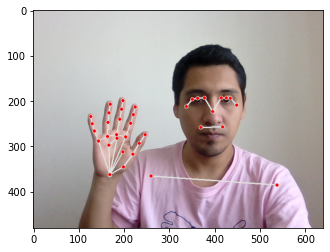

In [32]:
#Ejemplo de vizualizacion uniendo la ultima imagen(frame) con sus respectivos puntos de referencia 
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [39]:
results.left_hand_landmarks.landmark #Se pueden vizualizar los valores que estan en cada punto de referencia, posicion X,Y,Z

[x: 0.74258685
y: 0.70086133
z: 2.701703e-07
, x: 0.69657534
y: 0.67842716
z: -0.016441207
, x: 0.6546631
y: 0.6398141
z: -0.02480401
, x: 0.6250854
y: 0.6034578
z: -0.03232304
, x: 0.610239
y: 0.56672204
z: -0.039264932
, x: 0.6783956
y: 0.55560476
z: -0.010338977
, x: 0.65962046
y: 0.49740028
z: -0.02414071
, x: 0.6499437
y: 0.46230084
z: -0.035660945
, x: 0.644011
y: 0.43067944
z: -0.044281162
, x: 0.70694053
y: 0.5424015
z: -0.012913903
, x: 0.69377387
y: 0.4756306
z: -0.024176333
, x: 0.6860399
y: 0.43451077
z: -0.034380335
, x: 0.67874455
y: 0.3994144
z: -0.042111218
, x: 0.73669213
y: 0.54295236
z: -0.01868455
, x: 0.7288521
y: 0.4801899
z: -0.032832295
, x: 0.72095686
y: 0.44158578
z: -0.042659134
, x: 0.71234995
y: 0.40739414
z: -0.049402744
, x: 0.76681256
y: 0.5552895
z: -0.025899937
, x: 0.7760769
y: 0.50671697
z: -0.039112713
, x: 0.78086764
y: 0.4737645
z: -0.04575993
, x: 0.7831431
y: 0.4426953
z: -0.050205227
]

In [38]:
len(results.left_hand_landmarks.landmark) #Cantidad de puntos de referencia de la mano izquierda

21

In [35]:
results.right_hand_landmarks.landmark

[x: 0.26420864
y: 0.75530994
z: 3.394532e-07
, x: 0.31196135
y: 0.72077274
z: -0.018935887
, x: 0.34496057
y: 0.66157293
z: -0.02535096
, x: 0.3668578
y: 0.61085236
z: -0.030828228
, x: 0.38635707
y: 0.57243884
z: -0.036001664
, x: 0.32024288
y: 0.5816771
z: -0.01047937
, x: 0.33722326
y: 0.5193538
z: -0.0232202
, x: 0.34618014
y: 0.48027578
z: -0.035032526
, x: 0.3525323
y: 0.44513166
z: -0.043994423
, x: 0.288762
y: 0.5720522
z: -0.012468374
, x: 0.29905686
y: 0.5011567
z: -0.022652717
, x: 0.30489716
y: 0.45529896
z: -0.033583384
, x: 0.30955213
y: 0.41462535
z: -0.042209238
, x: 0.25719318
y: 0.5797242
z: -0.017784594
, x: 0.2586261
y: 0.5148686
z: -0.029711679
, x: 0.26204386
y: 0.47147402
z: -0.040704098
, x: 0.2671862
y: 0.43193847
z: -0.048918024
, x: 0.22508654
y: 0.6012751
z: -0.025152901
, x: 0.21199054
y: 0.55456656
z: -0.038160834
, x: 0.20385055
y: 0.52158475
z: -0.045362853
, x: 0.19917849
y: 0.48751912
z: -0.050289813
]

In [36]:
results.pose_landmarks.landmark

[x: 0.6202409
y: 0.46636376
z: -0.82988626
visibility: 0.99995726
, x: 0.64983064
y: 0.40302324
z: -0.7826201
visibility: 0.9998876
, x: 0.66566336
y: 0.4037208
z: -0.7824399
visibility: 0.99986476
, x: 0.68008476
y: 0.40563688
z: -0.782398
visibility: 0.99985534
, x: 0.5907754
y: 0.40405756
z: -0.76481366
visibility: 0.99990016
, x: 0.56839335
y: 0.406223
z: -0.76407754
visibility: 0.9999005
, x: 0.54964554
y: 0.40917698
z: -0.7641667
visibility: 0.9999212
, x: 0.7015868
y: 0.43597615
z: -0.44196162
visibility: 0.99985814
, x: 0.52820843
y: 0.44340548
z: -0.3391973
visibility: 0.99992377
, x: 0.6541374
y: 0.536072
z: -0.70699275
visibility: 0.99995136
, x: 0.5782569
y: 0.53848445
z: -0.6785024
visibility: 0.9999548
, x: 0.8408781
y: 0.8022494
z: -0.25586516
visibility: 0.9986136
, x: 0.4069148
y: 0.76048946
z: -0.20846877
visibility: 0.9996207
, x: 0.9239791
y: 1.2553543
z: -0.2638866
visibility: 0.27336326
, x: 0.2314831
y: 1.1616852
z: -0.6832572
visibility: 0.9318537
, x: 0.9226758

In [40]:
len(results.pose_landmarks.landmark)#Cantidad de puntos de referencia del cuerpo

33

In [42]:
frame

array([[[178, 175, 184],
        [174, 171, 179],
        [172, 170, 177],
        ...,
        [119, 126, 145],
        [119, 126, 146],
        [121, 128, 148]],

       [[176, 173, 182],
        [173, 170, 178],
        [172, 170, 177],
        ...,
        [122, 131, 149],
        [119, 127, 146],
        [117, 125, 145]],

       [[176, 172, 181],
        [175, 171, 180],
        [174, 171, 179],
        ...,
        [121, 131, 147],
        [121, 131, 148],
        [121, 131, 148]],

       ...,

       [[102, 103, 109],
        [102, 103, 109],
        [101, 102, 108],
        ...,
        [ 91,  96, 111],
        [ 93,  98, 113],
        [ 95,  99, 114]],

       [[103, 102, 108],
        [102, 101, 107],
        [100, 100, 106],
        ...,
        [ 92,  97, 112],
        [ 94,  98, 112],
        [ 95,  99, 113]],

       [[102, 100, 106],
        [101,  99, 105],
        [100,  99, 105],
        ...,
        [ 92,  96, 111],
        [ 93,  97, 111],
        [ 94,  97, 111]]

# 3-Obteniendo las posiciones de los puntos de referencia

In [8]:
def extract_keypoints(results):
    # 33 son los puntos de referencia de pose son 4, la posicion x,y,z y la cuarta es la visivilidad
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # 21 son los puntos de referencia de la mano, mientras que 3 son las posiciones x,y,z
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    # 21 son los puntos de referencia de la mano, mientras que 3 son las posiciones x,y,z
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,lh, rh])

In [8]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [51]:
result_test.shape

(258,)

In [185]:
np.save('0', result_test)

In [9]:
np.load('0.npy')

array([ 4.23261404e-01,  4.81943935e-01, -1.03985834e+00,  9.99919057e-01,
        4.55486208e-01,  4.18291837e-01, -9.78762150e-01,  9.99786675e-01,
        4.74043041e-01,  4.16245848e-01, -9.78791535e-01,  9.99851644e-01,
        4.89757121e-01,  4.15604919e-01, -9.78394628e-01,  9.99753475e-01,
        3.92167330e-01,  4.29761380e-01, -9.80535209e-01,  9.99718606e-01,
        3.74960870e-01,  4.34593886e-01, -9.80039895e-01,  9.99731541e-01,
        3.62108767e-01,  4.38348204e-01, -9.80394244e-01,  9.99526978e-01,
        5.15553474e-01,  4.39573973e-01, -5.79677284e-01,  9.99758959e-01,
        3.52186263e-01,  4.69871312e-01, -5.54250121e-01,  9.99830604e-01,
        4.63772684e-01,  5.46383977e-01, -8.93717885e-01,  9.99854147e-01,
        3.94098163e-01,  5.53240478e-01, -8.85785580e-01,  9.99880135e-01,
        6.46861911e-01,  7.50900924e-01, -2.59246349e-01,  9.98074710e-01,
        2.54191458e-01,  7.91462660e-01, -3.13653827e-01,  9.88188267e-01,
        8.09031844e-01,  

# 4- Se crean los directorios de los diferentes gestos

In [10]:
#Directorios para gestos
# Path es para la ruta, ademas se usara un array para el nombre de los gestos
DIRECTORIO = os.path.join('MP_Data_ZerosValoresIniciales') 

# Acciones a detectar
ACCIONES = np.array(['NONE','A','B','C','D','E','F','H','I','K','L','M','N','O','P','R','T','U','V','W','Y','Q','G','J','Ñ','S','X','Z','Hola','Chao','Comer','Caminar','Flaco','Alto','Bajo','Bonito','Hablar','Ayudar','Abrir','Disculpar','Vender','Dibujar','Planchar','Amigo','Responsable','Arrendar','Chocar','Vestir','Estudiar','Jugar'])

# Se tomaran en cuenta 30 secuencias(videos)
no_secuencias = 30

# Cada uno de estos videos tendra 30 frames
secuencias_frames = 30

In [11]:
#Se creran las carpetas contenedoras de las acciones y las 30 secuencias. Si ya existen se crea una excepcion y no se hace nada
for accion in ACCIONES: 
    for secuencia in range(no_secuencias):
        try: 
            os.makedirs(os.path.join(DIRECTORIO, accion, str(secuencia)))
        except:
            pass

# 5- Valores a ser capturados de los diferentes puntos de referencia

In [85]:
cap = cv2.VideoCapture(2)
# Se crea el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Se crea el ciclo de las acciones
    for accion in ACCIONES:
        # Se crea otro ciclo, esta segun el numero de secuencias
        for secuencia in range(no_secuencias):
            # Se crea otro ciclo con la longitud de cada video(frame)
            for frame_num in range(secuencias_frames):

                # # Lee el frame en este instante de tiempo
                ret, frame = cap.read()

                # Realiza las predicciones
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Muestra la vizualizacion de los puntos de referencia sobre la imagen
                draw_styled_landmarks(image, results)
                
                # Logica para la captura de las secuencias
                if frame_num == 0: 
                    cv2.putText(image, 'Comenzando...', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Recolectando frames para {} Video numero {}'.format(accion, secuencia), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Se muestra por pantalla
                    cv2.imshow('OpenCV imagen', image)
                    # Espera 1 segundo
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Recolectando frames para {} Video numero {}'.format(accion, secuencia), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Se muestra por pantalla
                    cv2.imshow('OpenCV imagen', image)
                
                # Se guardan los puntos de referencia
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DIRECTORIO, accion, str(secuencia), str(frame_num))
                np.save(npy_path, keypoints)

                # Se realiza un Break
                if cv2.waitKey(10) & 0xFF == ord('e'):
                    break
        
                    
    cap.release()
    cv2.destroyAllWindows()

# 6- Preproceamiento de los datos y se crea las clases para cada gesto

In [25]:
from sklearn.model_selection import train_test_split #nos permite partir nuestros datos en entrenamiento y testeo
from tensorflow.keras.utils import to_categorical #tranformara los valores dentro de un array en 0 y 1 dependiendo de la secuencia

In [26]:
label_map = {label:num for num, label in enumerate(ACCIONES)}

In [27]:
#Se crea un diccionario de las secuencias(gestos)
label_map

{'NONE': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'P': 14,
 'R': 15,
 'T': 16,
 'U': 17,
 'V': 18,
 'W': 19,
 'Y': 20,
 'Q': 21,
 'G': 22,
 'J': 23,
 'Ñ': 24,
 'S': 25,
 'X': 26,
 'Z': 27,
 'Hola': 28,
 'Chao': 29,
 'Comer': 30,
 'Caminar': 31,
 'Flaco': 32,
 'Alto': 33,
 'Bajo': 34,
 'Bonito': 35,
 'Hablar': 36,
 'Ayudar': 37,
 'Abrir': 38,
 'Disculpar': 39,
 'Vender': 40,
 'Dibujar': 41,
 'Planchar': 42,
 'Amigo': 43,
 'Responsable': 44,
 'Arrendar': 45,
 'Chocar': 46,
 'Vestir': 47,
 'Estudiar': 48,
 'Jugar': 49}

In [28]:
ACCIONES[1]

'A'

In [29]:
secuencias, labels = [], []
for accion in ACCIONES:
    for secuencia in range(no_secuencias):
        window = []
        for frame_num in range(secuencias_frames):
            #carga los diferentes frames
            res = np.load(os.path.join(DIRECTORIO, accion, str(secuencia), "{}.npy".format(frame_num)))
            window.append(res)#agrega los frame para completa una secuencia
        secuencias.append(window)#une la secuencia creada a un array de secuencias
        labels.append(label_map[accion])# se agregan los gestos que se van realizando

In [30]:
np.array(secuencias).shape

(1500, 30, 258)

In [31]:
np.array(labels).shape

(1500,)

In [32]:
X = np.array(secuencias)

In [33]:
X.shape

(1500, 30, 258)

In [34]:
# Se guarda la etiqueta de cada secuencia
#to_categorical transforma nuestra accion inicial que eran numeros eqtiqutados de 0 a N en una matriz de valores con 0 y 1.
# Esto es llamado hot Encoded
y = to_categorical(labels).astype(int) 

In [35]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_test.shape

(300, 30, 258)

In [38]:
y_test.shape

(300, 50)

# 7- Se Contruyen las diferentes redes neuronales recurrentes a probar

In [39]:
#7. Build and Train LSTM Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , GRU , SimpleRNN, Bidirectional
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
#se crea un objeto TensorBoard Callback y se le proporciona la ruta del directorio de registro. Este objeto se puede pasar a la función fit() del modelo de TensorFlow para registrar y visualizar el rendimiento durante el entrenamiento.

In [41]:
#@tf.function(experimental_relax_shapes=True)
def b_clasificador():
    model = Sequential()# Crea una red neuronal,Crea un contenedor, como una caja vacia a la cual comenzamos a agregar secuencialmente las diferentes capas del modelo
    model.add(GRU(64, return_sequences=True, input_shape=(30,258)))
    model.add(GRU(64, return_sequences=False))
    model.add(Dense(ACCIONES.shape[0], activation='softmax'))
    model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [171]:
#Modelo CNN LSTM
model = Sequential()# Crea una red neuronal,Crea un contenedor, como una caja vacia a la cual comenzamos a agregar secuencialmente las diferentes capas del modelo
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(ACCIONES.shape[0], activation='softmax'))

In [108]:
#Modelo LSTM con solo una capa
model = Sequential()# Crea una red neuronal,Crea un contenedor, como una caja vacia a la cual comenzamos a agregar secuencialmente las diferentes capas del modelo
model.add(LSTM(128, return_sequences=False, activation='tanh', input_shape=(30,258)))
#model.add(Dense(8, activation='tanh'))
model.add(Dense(ACCIONES.shape[0], activation='softmax'))

In [76]:
#Modelo SimpleRNN
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, activation='sigmoid', input_shape=(30,126)))
model.add(SimpleRNN(128, return_sequences=True, activation='sigmoid'))
model.add(SimpleRNN(64, return_sequences=False, activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(ACCIONES.shape[0], activation='softmax'))

In [42]:
#Modelo GRU
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='tanh', input_shape=(30,258)))
model.add(GRU(64, return_sequences=False, activation='tanh'))
model.add(Dense(ACCIONES.shape[0], activation='softmax'))

In [107]:
#Modelo Bidirecional LSTM
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,126))))
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='tanh')))
model.add(Bidirectional(LSTM(64, return_sequences=False, activation='tanh')))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(ACCIONES.shape[0], activation='softmax'))

In [43]:
[ACCIONES.shape[0]]

[50]

In [44]:
 model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [166]:
#validation_split=0.20
#validation_data=(X_test, y_test)
start = time()
history=model.fit(X_train, y_train, epochs=800, validation_data=(X_test, y_test) )
print(time()-start)

Epoch 1/800
38/38 [==============================] - 7s 64ms/step - loss: 3.7410 - accuracy: 0.0550 - val_loss: 3.4886 - val_accuracy: 0.0600
Epoch 2/800
38/38 [==============================] - 1s 25ms/step - loss: 3.3134 - accuracy: 0.1267 - val_loss: 3.1142 - val_accuracy: 0.1633
Epoch 3/800
38/38 [==============================] - 1s 23ms/step - loss: 2.8767 - accuracy: 0.2225 - val_loss: 2.6844 - val_accuracy: 0.3033
Epoch 4/800
38/38 [==============================] - 1s 23ms/step - loss: 2.4288 - accuracy: 0.3825 - val_loss: 2.3071 - val_accuracy: 0.3967
Epoch 5/800
38/38 [==============================] - 1s 23ms/step - loss: 2.0758 - accuracy: 0.4642 - val_loss: 2.0644 - val_accuracy: 0.4433
Epoch 6/800
38/38 [==============================] - 1s 23ms/step - loss: 1.7840 - accuracy: 0.5550 - val_loss: 1.7221 - val_accuracy: 0.5433
Epoch 7/800
38/38 [==============================] - 1s 23ms/step - loss: 1.5385 - accuracy: 0.6150 - val_loss: 1.5498 - val_accuracy: 0.5533
Epoch 

38/38 [==============================] - 1s 23ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9667
Epoch 116/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1391 - val_accuracy: 0.9667
Epoch 117/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1354 - val_accuracy: 0.9667
Epoch 118/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9667
Epoch 119/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1400 - val_accuracy: 0.9667
Epoch 120/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1375 - val_accuracy: 0.9667
Epoch 121/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9667
Epoch 

Epoch 172/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 0.9667
Epoch 173/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9667
Epoch 174/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9667
Epoch 175/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1475 - val_accuracy: 0.9667
Epoch 176/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1478 - val_accuracy: 0.9633
Epoch 177/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1503 - val_accuracy: 0.9667
Epoch 178/800
38/38 [==============================] - 1s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1490 - val_accuracy:

Epoch 228/800
38/38 [==============================] - 1s 25ms/step - loss: 4.0840e-04 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9667
Epoch 229/800
38/38 [==============================] - 1s 26ms/step - loss: 4.0005e-04 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9667
Epoch 230/800
38/38 [==============================] - 1s 26ms/step - loss: 3.9355e-04 - accuracy: 1.0000 - val_loss: 0.1580 - val_accuracy: 0.9700
Epoch 231/800
38/38 [==============================] - 1s 27ms/step - loss: 3.8492e-04 - accuracy: 1.0000 - val_loss: 0.1576 - val_accuracy: 0.9667
Epoch 232/800
38/38 [==============================] - 1s 25ms/step - loss: 3.7750e-04 - accuracy: 1.0000 - val_loss: 0.1638 - val_accuracy: 0.9667
Epoch 233/800
38/38 [==============================] - 1s 25ms/step - loss: 3.6936e-04 - accuracy: 1.0000 - val_loss: 0.1568 - val_accuracy: 0.9700
Epoch 234/800
38/38 [==============================] - 1s 26ms/step - loss: 3.6172e-04 - accuracy: 1.0000 - val_

38/38 [==============================] - 1s 26ms/step - loss: 4.6163e-05 - accuracy: 1.0000 - val_loss: 0.1947 - val_accuracy: 0.9667
Epoch 339/800
38/38 [==============================] - 1s 26ms/step - loss: 4.5250e-05 - accuracy: 1.0000 - val_loss: 0.1927 - val_accuracy: 0.9700
Epoch 340/800
38/38 [==============================] - 1s 24ms/step - loss: 4.4383e-05 - accuracy: 1.0000 - val_loss: 0.1962 - val_accuracy: 0.9667
Epoch 341/800
38/38 [==============================] - 1s 25ms/step - loss: 4.3511e-05 - accuracy: 1.0000 - val_loss: 0.1961 - val_accuracy: 0.9667
Epoch 342/800
38/38 [==============================] - 1s 25ms/step - loss: 4.2601e-05 - accuracy: 1.0000 - val_loss: 0.1924 - val_accuracy: 0.9667
Epoch 343/800
38/38 [==============================] - 1s 26ms/step - loss: 4.1807e-05 - accuracy: 1.0000 - val_loss: 0.1978 - val_accuracy: 0.9667
Epoch 344/800
38/38 [==============================] - 1s 25ms/step - loss: 4.0994e-05 - accuracy: 1.0000 - val_loss: 0.1931 -

38/38 [==============================] - 1s 26ms/step - loss: 5.3412e-06 - accuracy: 1.0000 - val_loss: 0.2327 - val_accuracy: 0.9700
Epoch 449/800
38/38 [==============================] - 1s 26ms/step - loss: 5.2431e-06 - accuracy: 1.0000 - val_loss: 0.2287 - val_accuracy: 0.9700
Epoch 450/800
38/38 [==============================] - 1s 24ms/step - loss: 5.1365e-06 - accuracy: 1.0000 - val_loss: 0.2304 - val_accuracy: 0.9700
Epoch 451/800
38/38 [==============================] - 1s 27ms/step - loss: 5.0365e-06 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9700
Epoch 452/800
38/38 [==============================] - 1s 25ms/step - loss: 4.9459e-06 - accuracy: 1.0000 - val_loss: 0.2290 - val_accuracy: 0.9700
Epoch 453/800
38/38 [==============================] - 1s 27ms/step - loss: 4.8470e-06 - accuracy: 1.0000 - val_loss: 0.2355 - val_accuracy: 0.9667
Epoch 454/800
38/38 [==============================] - 1s 26ms/step - loss: 4.7516e-06 - accuracy: 1.0000 - val_loss: 0.2323 -

38/38 [==============================] - 1s 27ms/step - loss: 6.5277e-07 - accuracy: 1.0000 - val_loss: 0.2574 - val_accuracy: 0.9667
Epoch 559/800
38/38 [==============================] - 1s 26ms/step - loss: 6.3926e-07 - accuracy: 1.0000 - val_loss: 0.2556 - val_accuracy: 0.9667
Epoch 560/800
38/38 [==============================] - 1s 26ms/step - loss: 6.2883e-07 - accuracy: 1.0000 - val_loss: 0.2551 - val_accuracy: 0.9667
Epoch 561/800
38/38 [==============================] - 1s 27ms/step - loss: 6.1691e-07 - accuracy: 1.0000 - val_loss: 0.2556 - val_accuracy: 0.9667
Epoch 562/800
38/38 [==============================] - 1s 26ms/step - loss: 6.0578e-07 - accuracy: 1.0000 - val_loss: 0.2543 - val_accuracy: 0.9667
Epoch 563/800
38/38 [==============================] - 1s 25ms/step - loss: 5.9356e-07 - accuracy: 1.0000 - val_loss: 0.2565 - val_accuracy: 0.9667
Epoch 564/800
38/38 [==============================] - 1s 25ms/step - loss: 5.8422e-07 - accuracy: 1.0000 - val_loss: 0.2561 -

38/38 [==============================] - 1s 25ms/step - loss: 2.5646 - accuracy: 0.7417 - val_loss: 4.9676 - val_accuracy: 0.2367
Epoch 669/800
38/38 [==============================] - 1s 26ms/step - loss: 2.7444 - accuracy: 0.3875 - val_loss: 1.7031 - val_accuracy: 0.5133
Epoch 670/800
38/38 [==============================] - 1s 27ms/step - loss: 1.2284 - accuracy: 0.6258 - val_loss: 1.0879 - val_accuracy: 0.6433
Epoch 671/800
38/38 [==============================] - 1s 26ms/step - loss: 0.9041 - accuracy: 0.7217 - val_loss: 0.6651 - val_accuracy: 0.8167
Epoch 672/800
38/38 [==============================] - 1s 26ms/step - loss: 0.5910 - accuracy: 0.8167 - val_loss: 0.6135 - val_accuracy: 0.8433
Epoch 673/800
38/38 [==============================] - 1s 26ms/step - loss: 0.5550 - accuracy: 0.8192 - val_loss: 0.6321 - val_accuracy: 0.8267
Epoch 674/800
38/38 [==============================] - 1s 26ms/step - loss: 0.4842 - accuracy: 0.8417 - val_loss: 0.6972 - val_accuracy: 0.7800
Epoch 

Epoch 725/800
38/38 [==============================] - 1s 26ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1648 - val_accuracy: 0.9667
Epoch 726/800
38/38 [==============================] - 1s 25ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1675 - val_accuracy: 0.9667
Epoch 727/800
38/38 [==============================] - 1s 27ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1613 - val_accuracy: 0.9633
Epoch 728/800
38/38 [==============================] - 1s 29ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1661 - val_accuracy: 0.9667
Epoch 729/800
38/38 [==============================] - 1s 26ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1648 - val_accuracy: 0.9667
Epoch 730/800
38/38 [==============================] - 1s 25ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9667
Epoch 731/800
38/38 [==============================] - 1s 26ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1653 - val_accuracy:

In [167]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 30, 64)            62208     
                                                                 
 gru_5 (GRU)                 (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
Total params: 90,418
Trainable params: 90,418
Non-trainable params: 0
_________________________________________________________________


# 8-Obteniendo datos a partir de las predicciones

In [34]:
AccuracyTrain=history.history['accuracy']#Acccuracy del entrenamiento

NameError: name 'history' is not defined

In [190]:
np.std(AccuracyTrain)#Desviacion estandar del entrenamiento

0.0772187754770637

In [191]:
np.var(AccuracyTrain)#Varianza del entrenamiento

0.005962739286177173

In [192]:
LossTrain=history.history['loss']#Perdida del entrenamiento
np.mean(LossTrain)

0.06919921435070943

In [193]:
np.std(LossTrain)#Desviacion estandar de la perdida del entrenamiento

0.30837753547882235

In [194]:
# Presicion y perdida de los datos de testeo
test_loss, test_acc =model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy', test_acc,test_loss)

10/10 - 0s - loss: 0.1950 - accuracy: 0.9567 - 92ms/epoch - 9ms/step

Test accuracy 0.9566666483879089 0.19498740136623383


# 9- Utilizando validacion cruzada 

In [176]:
from tensorflow.keras.preprocessing import image

In [177]:
from tensorflow import keras

In [178]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [179]:
start = time()
clasificador = KerasClassifier(build_fn = b_clasificador, epochs=800)

historia2 = cross_val_score(estimator = clasificador,X = X_train, y=y_train, cv=5, n_jobs=-1)
print(time()-start)#Al finalizar te muestra el tiempo transcurrido

<ipython-input-179-939559220d34>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clasificador = KerasClassifier(build_fn = b_clasificador, epochs=800)


1277.8938415050507


In [180]:
# Accuracy promedio de las 5 particiones
historia2

array([0.96666664, 0.98333335, 0.87916666, 0.96666664, 0.91666669])

In [181]:
historia2.mean()#Promedio accuracy

0.9424999952316284

In [95]:
np.std(historia2)#Desviacion estandar

0.02693154793259442

# 10- Se guardan y cargan los pesos del modelo

In [184]:
#Se guarda el modelo
model.save('GRUposeAndHand_2GRU1output_64-64-GestosDinamicosCompleto.h5')

In [45]:
#Se carga el modelo
model.load_weights('GRUposeAndHand_2GRU1output_64-64-GestosDinamicosCompleto.h5')

In [46]:
#Prueba de gesto
res = model.predict(X_test)
ACCIONES[np.argmax(res[0])]

10/10 [==============================] - 2s 13ms/step


'Disculpar'

In [47]:
#Resultado o etiqueta del gesto
ACCIONES[np.argmax(y_test[0])]

'Disculpar'

# 11-Se evalua la matriz de confusion

In [48]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [49]:
yhat = model.predict(X_test)

10/10 [==============================] - 0s 12ms/step


In [50]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [51]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[292,   0],
        [  0,   8]],

       [[296,   0],
        [  0,   4]],

       [[291,   0],
        [  0,   9]],

       [[295,   0],
        [  0,   5]],

       [[296,   0],
        [  1,   3]],

       [[293,   0],
        [  0,   7]],

       [[294,   0],
        [  0,   6]],

       [[294,   0],
        [  0,   6]],

       [[293,   0],
        [  0,   7]],

       [[294,   1],
        [  0,   5]],

       [[294,   0],
        [  0,   6]],

       [[296,   0],
        [  0,   4]],

       [[298,   0],
        [  0,   2]],

       [[293,   0],
        [  0,   7]],

       [[297,   0],
        [  0,   3]],

       [[297,   0],
        [  0,   3]],

       [[293,   0],
        [  0,   7]],

       [[291,   0],
        [  0,   9]],

       [[291,   0],
        [  0,   9]],

       [[293,   0],
        [  0,   7]],

       [[292,   1],
        [  0,   7]],

       [[293,   0],
        [  0,   7]],

       [[292,   0],
        [  0,   8]],

       [[289,   0],
        [  1, 

# 11 - Testeo en tiempo real

In [54]:
secuencia = []
sentence = []
threshold = 0.85

cap = cv2.VideoCapture(2)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Lee el frame en este instante de tiempo
        ret, frame = cap.read()
        

        # Realiza las predicciones
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Muestra la vizualizacion de los puntos de referencia sobre la imagen
        draw_styled_landmarks(image, results)
        
        # Logica para la prediccion
        keypoints = extract_keypoints(results)# Obtiene los keypoints de la pose y manos
        secuencia.append(keypoints)
        secuencia = secuencia[-30:]
        
        if len(secuencia) == 30:# Una vez se cumpla la condicion de que hayan 30 frames en secuencia se entra al if
            res = model.predict(np.expand_dims(secuencia, axis=0))[0]# Se expande secuencia y asi enviar los valores requeridos por el modelo
            print(ACCIONES[np.argmax(res)])
            
            # Logica para la vizualizacion de los gestos
            if res[np.argmax(res)] > threshold: #Si el valor obtenido es mayor al umbral de confianza, entonces entra en el if
                    
                    if len(sentence) > 0: 
                        if ACCIONES[np.argmax(res)] != sentence[-1]:# Si la accion/gesto actual es distinto al anterior entonces se agrega, previene duplicados
                            sentence.append(ACCIONES[np.argmax(res)])
                    else:#Si esta vacio entonces se agrega directamente la accion/gesto
                        sentence.append(ACCIONES[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
            cv2.rectangle(image, (0,0), (640, 40), (0, 0, 0), -1)
            cv2.putText(image,' '.join(sentence), (4,30),#posicion de las palabras
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        
        # Mostar por pantalla
        cv2.imshow('OpenCV Feed', image)

        # Se realiza un Break
        if cv2.waitKey(10) & 0xFF == ord('e'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 45ms/step
NONE
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
NONE
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
NONE
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
NONE
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
NONE
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
NONE
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
NONE
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
NONE
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
NONE
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 36ms/step
Responsable
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Responsable
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
Responsable
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Disculpar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
Disculpar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Disculpar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
Disculpar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
Disculpar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 

In [77]:
X_test[0].shape

(30, 258)

# 12 - Graficos

In [12]:
import matplotlib.pyplot as plt

# Grafico para la precisión

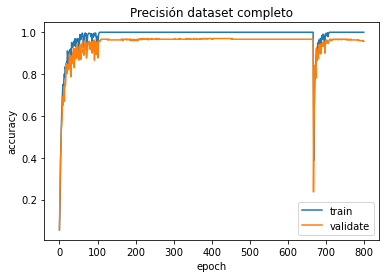

In [182]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Precisión dataset completo")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validate'])
plt.show()

# Grafico para la perdiada

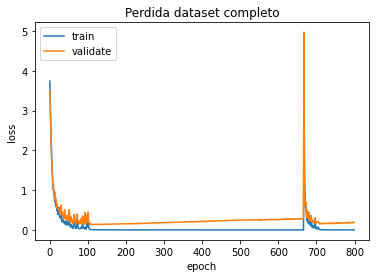

In [183]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Perdida dataset completo")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validate'])
plt.show()

# Graficos de caja para la obtencion del optimizador

In [11]:
!pip install tabulate


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
!pip install prettytable 


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns

In [3]:
# 2 Capas ocultas 2 RNN, con 32 y 64 neuronas respectivamente
DosRNN32_64=pd.read_csv('Hoja2.csv')

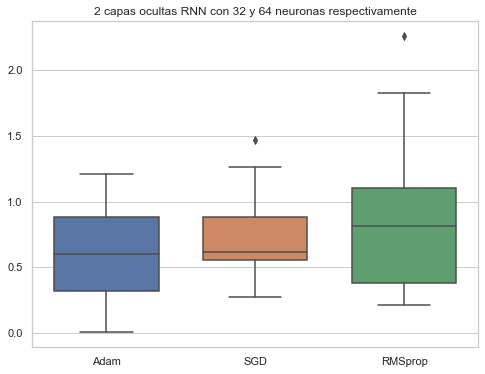

In [4]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=DosRNN32_64, width=0.7)
#title
plt.title("2 capas ocultas RNN con 32 y 64 neuronas respectivamente")

plt.show()

In [5]:
# 2 Capas ocultas 2 RNN, con 64 y 64 neuronas respectivamente
DosRNN64_64=pd.read_csv('2RNN-64-64.csv')

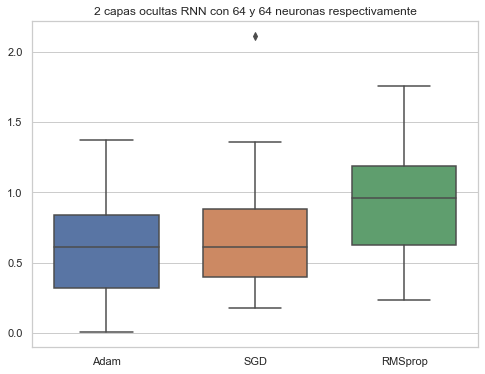

In [6]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=DosRNN64_64, width=0.7)
#title
plt.title("2 capas ocultas RNN con 64 y 64 neuronas respectivamente")

plt.show()

In [7]:
# 3 Capas ocultas 3 RNN, con 64 , 64 ,64 neuronas respectivamente
TresRNN64_64_64=pd.read_csv('3RNN-64-64-64.csv')

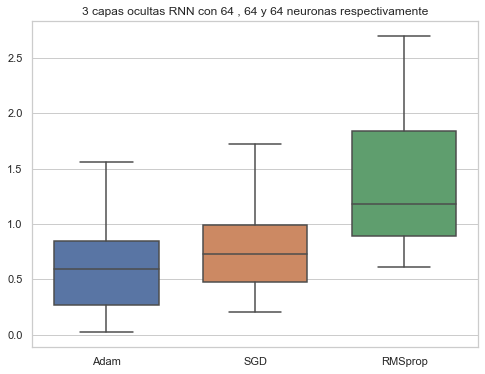

In [8]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=TresRNN64_64_64, width=0.7)
#title
plt.title("3 capas ocultas RNN con 64 , 64 y 64 neuronas respectivamente")

plt.show()

In [9]:
DosRNNUnDense32_64_64=pd.read_csv('2RNN1DENSA-32-64-64.csv')

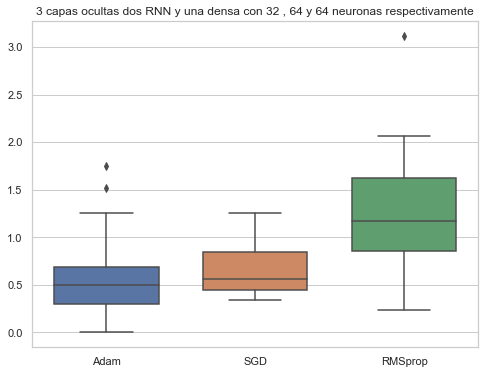

In [10]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=DosRNNUnDense32_64_64, width=0.7)
#title
plt.title("3 capas ocultas dos RNN y una densa con 32 , 64 y 64 neuronas respectivamente")

plt.show()